In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mason_functions as mf
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

### Exercise IV

In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

print the first 3 rows

print the number of rows and columns (shape)

print the column names

print the data type of each column

print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [2]:
df_iris = data('iris')
df_iris_sns = sns.load_dataset('iris')
df_iris_sns.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [3]:
df_iris.columns = df_iris.columns.str.lower().str.replace('.', '_')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
if __name__ == '__main__':
    print('First 3 rows')
    print('------------')
    print(df_iris.head(3))
    print('==================================')
    print(f'There are {df_iris.shape[0]} rows and {df_iris.shape[1]} columns.')
    print('==================================')
    print('Column names')
    print('-------------')
    print(df_iris.dtypes)
    print('==================================')
    print('Data Frame Info')
    print('---------------')
    print(df_iris.info())
    print('==================================')
    print('Summary Statistics')
    print('------------------')
    print(df_iris.describe().T)
#nope, looks good to me

First 3 rows
------------
   sepal_length  sepal_width  petal_length  petal_width species
1           5.1          3.5           1.4          0.2  setosa
2           4.9          3.0           1.4          0.2  setosa
3           4.7          3.2           1.3          0.2  setosa
There are 150 rows and 5 columns.
Column names
-------------
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
Data Frame Info
---------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB
None
Summary Statistics
----------

### Exercise V

Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

assign the first 100 rows to a new dataframe, df_excel_sample

print the number of rows of your original dataframe

print the first 5 column names

print the column names that have a data type of object

compute the range for each of the numeric variables.

In [5]:
#df_excel = pd.read_clipboard()
#df_excel_sample = df_excel.head(100)
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name = 'Table1_CustDetails')
df_excel_sample = df_excel.head(100)

In [6]:
if __name__ == '__main__':
    print(f'There are {df_excel.shape[0]} rows')
    print('==================================')
    print('These are the first 5 columns')
    print('-----------------------------')
    print(df_excel.columns[:5].to_list())
    print('==================================')
    print('These are the columns with data type "object"')
    print('---------------------------------------------')
    print(df_excel.columns[df_excel.dtypes == object])
    print('==================================')
    print('Numeric variable ranges')
    print('-----------------------')
    print(df_excel[df_excel.columns[df_excel.dtypes == float]].max() - df_excel[df_excel.columns[df_excel.dtypes == float]].min())
#space

There are 7049 rows
These are the first 5 columns
-----------------------------
['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']
These are the columns with data type "object"
---------------------------------------------
Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')
Numeric variable ranges
-----------------------
monthly_charges     100.5
total_charges      8666.0
Unnamed: 12           NaN
Unnamed: 13           NaN
dtype: float64


In [7]:
df_excel.describe().T, df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
 12  Unnamed: 12        0 non-null      float64
 13  Unnamed: 13        0 non-null      float64
dtypes: float64(4), int64(4), object(6)
memory usage: 771.1+ KB


(                    count         mean          std    min       25%      50%  \
 is_senior_citizen  7049.0     0.162009     0.368485   0.00    0.0000     0.00   
 phone_service      7049.0     1.324585     0.642709   0.00    1.0000     1.00   
 internet_service   7049.0     1.222585     0.779068   0.00    1.0000     1.00   
 contract_type      7049.0     0.690878     0.833757   0.00    0.0000     0.00   
 monthly_charges    7049.0    64.747014    30.099460  18.25   35.4500    70.35   
 total_charges      7038.0  2283.043883  2266.521984  18.80  401.5875  1397.10   
 Unnamed: 12           0.0          NaN          NaN    NaN       NaN      NaN   
 Unnamed: 13           0.0          NaN          NaN    NaN       NaN      NaN   
 
                         75%      max  
 is_senior_citizen     0.000     1.00  
 phone_service         2.000     2.00  
 internet_service      2.000     2.00  
 contract_type         1.000     2.00  
 monthly_charges      89.850   118.75  
 total_charges      

In [8]:
#df_excel.select_dtypes(include=[object]) <-- this is cool, mason
#df_excel[df_excel.columns[(df_excel.dtypes == float) | (df_excel.dtypes == int)]].max() - df_excel[df_excel.columns[(df_excel.dtypes == float) | (df_excel.dtypes == int)]].min()

### Exercise 6

Read the data from this google sheet into a dataframe, df_google

print the first 3 rows.

print the number of rows and columns.

print the column names.

print the data type of each column.

print the summary statistics for each of the numeric variables.

print the unique values for each of your categorical variables.

In [9]:
#df_google = pd.read_clipboard()
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

In [10]:
if __name__ == '__main__':
    print('These are the first 3 rows:')
    print('---------------------------')
    print(df_google.head(3))
    print('===================================================')
    print(f'There are {df_google.shape[0]} rows and {df_google.shape[1]} columns')
    print('===================================================')
    print('These are the column names and data types:')
    print('------------------------------------------')
    print(df_google.dtypes)
    print('===================================================')
    print('Summary Statistics')
    print('------------------')
    print(df_google.describe().T)

These are the first 3 rows:
---------------------------
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
There are 891 rows and 12 columns
These are the column names and data types:
------------------------------------------
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp       

In [11]:
if __name__ == '__main__':    
    for x in df_google.columns:
        print(f'{x} has {df_google[x].nunique()} unique values.')

PassengerId has 891 unique values.
Survived has 2 unique values.
Pclass has 3 unique values.
Name has 891 unique values.
Sex has 2 unique values.
Age has 88 unique values.
SibSp has 7 unique values.
Parch has 7 unique values.
Ticket has 681 unique values.
Fare has 248 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


In [12]:
if __name__ == '__main__':
    print('Unique Values for Categorical Variables')
    print('---------------------------------------')
    print('Survived')
    print('--------')
    print(df_google.Survived.value_counts(dropna = False))
    print('========================')
    print('Pclass')
    print('------')
    print(df_google.Pclass.value_counts(dropna = False))
    print('========================')
    print('Sex')
    print('---')
    print(df_google.Sex.value_counts(dropna = False))
    print('========================')
    print('Embarked')
    print('--------')
    print(df_google.Embarked.value_counts(dropna = False))

Unique Values for Categorical Variables
---------------------------------------
Survived
--------
0    549
1    342
Name: Survived, dtype: int64
Pclass
------
3    491
1    216
2    184
Name: Pclass, dtype: int64
Sex
---
male      577
female    314
Name: Sex, dtype: int64
Embarked
--------
S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64


# Prepare Exercises

## Exercise I
Using the Iris Data:

#### 1) Use the function defined in acquire.py to load the iris data.

In [13]:
import acquire
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


#### 2) Drop the species_id and measurement_id columns.

In [14]:
iris_df.drop(columns = ['species_id', 'measurement_id'], inplace = True)

#### 3) Rename the species_name column to just species.

In [15]:
iris_df.rename(columns = {'species_name': 'species'}, inplace = True)

In [16]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

#### 4) Create dummy variables of the species name and concatenate onto the iris dataframe.

In [17]:
iris_dummy_df = pd.get_dummies(iris_df['species'], drop_first = False)
iris_dummy_df.sample(7)
iris = pd.concat([iris_df, iris_dummy_df], axis = 1)
iris.sample(7)

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
106,4.9,2.5,4.5,1.7,virginica,0,0,1
31,5.4,3.4,1.5,0.4,setosa,1,0,0
110,6.5,3.2,5.1,2.0,virginica,0,0,1
10,5.4,3.7,1.5,0.2,setosa,1,0,0
41,4.5,2.3,1.3,0.3,setosa,1,0,0
146,6.3,2.5,5.0,1.9,virginica,0,0,1
137,6.4,3.1,5.5,1.8,virginica,0,0,1


#### 5) Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied

In [18]:
def prep_iris():
    import acquire
    iris_df = acquire.get_iris_data()
    iris_df.drop(columns = ['species_id', 'measurement_id'], inplace = True)
    iris_df.rename(columns = {'species_name': 'species'}, inplace = True)
    iris_dummy_df = pd.get_dummies(iris_df['species'], drop_first = False)
    iris = pd.concat([iris_df, iris_dummy_df], axis = 1)
    return iris

prep_iris()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


## Exercise II

Using the Titanic dataset

#### 1) Use the function defined in acquire.py to load the Titanic data.

In [19]:
titanic_df = acquire.get_titanic_data()
titanic_df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


#### 2) Drop any unnecessary, unhelpful, or duplicated columns.

In [20]:
if __name__ == '__main__':
    print('These are the first 5 rows:')
    print('---------------------------')
    print(titanic_df.head())
    print('===================================================')
    print(f'There are {titanic_df.shape[0]} rows and {titanic_df.shape[1]} columns')
    print('===================================================')
    print('Column info')
    print('-----------')
    print(titanic_df.info())
    print('===================================================')
    print('Summary Statistics')
    print('------------------')
    print(titanic_df.describe().T)

These are the first 5 rows:
---------------------------
   passenger_id  survived  pclass     sex   age  sibsp  parch     fare  \
0             0         0       3    male  22.0      1      0   7.2500   
1             1         1       1  female  38.0      1      0  71.2833   
2             2         1       3  female  26.0      0      0   7.9250   
3             3         1       1  female  35.0      1      0  53.1000   
4             4         0       3    male  35.0      0      0   8.0500   

  embarked  class deck  embark_town  alone  
0        S  Third  NaN  Southampton      0  
1        C  First    C    Cherbourg      0  
2        S  Third  NaN  Southampton      1  
3        S  First    C  Southampton      0  
4        S  Third  NaN  Southampton      1  
There are 891 rows and 13 columns
Column info
-----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        ----

In [21]:
print(titanic_df.shape)
titanic_df = titanic_df.drop_duplicates()
print(titanic_df.shape)

(891, 13)
(891, 13)


In [22]:
titanic_df = titanic_df.drop(columns = ['embarked', 'deck'])
titanic_df.shape

(891, 11)

#### 3) Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [23]:
titanic_df['embark_town'] = titanic_df.embark_town.fillna(value = 'Southampton')
titanic_df.embark_town.isna().sum()

0

In [24]:
dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na = False, drop_first = False)
dummy_df

,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [25]:
titanic_df = pd.concat([titanic_df, dummy_df], axis = 1)
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_female,sex_male,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,22.0,1,0,7.2500,Third,Southampton,0,0,1,0,0,1
1,1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,1,0,1,0,0
2,2,1,3,female,26.0,0,0,7.9250,Third,Southampton,1,1,0,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,First,Southampton,0,1,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,Third,Southampton,1,0,1,0,0,1


#### 4) Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [26]:
def prep_titanic():
    titanic_df = acquire.get_titanic_data()
    titanic_df = titanic_df.drop_duplicates()
    titanic_df = titanic_df.drop(columns = ['embarked', 'deck'], inplace = True)
    titanic_df['embark_town'] = titanic_df.embark_town.fillna(value = 'Southampton')
    dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na = False, drop_first = False)
    titanic_df = pd.concat([titanic_df, dummy_df], axis = 1)
    return titanic_df

## Exercise III

Using the Telco dataset

Use the function defined in acquire.py to load the Telco data.

Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.



# Exploratory Analysis Exercises

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

#### 1) Acquire, prepare & split your data.

#### 2) Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

#### 3) Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

#### 4) Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions

#### 1) Acquire, prepare & split your data.

In [27]:
iris = prep_iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [28]:
def split_iris_data(df):
    # 20% test, 80% train_validate
    # then of the 80% train_validate: 30% validate, 70% train. 
    '''
    Takes in a dataframe and returns the train, validate, and test subset dataframes
    '''
    train, test = train_test_split(df, test_size = .2, random_state = 123, stratify = df.species)
    train, validate = train_test_split(train, test_size = .3, random_state = 123, stratify = train.species)
    return train, validate, test

In [29]:
train, validate, test = split_iris_data(iris)
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

Train: (84, 8)
Validate: (36, 8)
Test: (30, 8)


In [30]:
def prep_iris_data(iris):
    '''
    This function acquires, preps, and splits my datas
    '''
    iris = prep_iris()
    train, validate, test = split_iris_data(iris)
    return train, validate, test

In [31]:
prep_iris_data(iris)

(     sepal_length  sepal_width  petal_length  petal_width     species  setosa  \
 79            5.7          2.6           3.5          1.0  versicolor       0   
 36            5.5          3.5           1.3          0.2      setosa       1   
 133           6.3          2.8           5.1          1.5   virginica       0   
 95            5.7          3.0           4.2          1.2  versicolor       0   
 18            5.7          3.8           1.7          0.3      setosa       1   
 139           6.9          3.1           5.4          2.1   virginica       0   
 20            5.4          3.4           1.7          0.2      setosa       1   
 31            5.4          3.4           1.5          0.4      setosa       1   
 6             4.6          3.4           1.4          0.3      setosa       1   
 115           6.4          3.2           5.3          2.3   virginica       0   
 91            6.1          3.0           4.6          1.4  versicolor       0   
 145           6

#### 2) Univariate Stats
For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
Document takeaways & any actions.

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 79 to 73
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  84 non-null     float64
 1   sepal_width   84 non-null     float64
 2   petal_length  84 non-null     float64
 3   petal_width   84 non-null     float64
 4   species       84 non-null     object 
 5   setosa        84 non-null     uint8  
 6   versicolor    84 non-null     uint8  
 7   virginica     84 non-null     uint8  
dtypes: float64(4), object(1), uint8(3)
memory usage: 4.2+ KB


,count,mean,std,min,25%,50%,75%,max
sepal_length,84.0,5.870238,0.769099,4.4,5.375,5.80,6.4,7.9
sepal_width,84.0,3.075000,0.448256,2.2,2.800,3.00,3.4,4.4
petal_length,84.0,3.771429,1.734940,1.2,1.600,4.25,5.1,6.9
petal_width,84.0,1.203571,0.752577,0.1,0.400,1.30,1.8,2.5


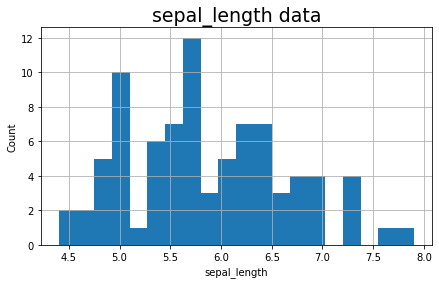

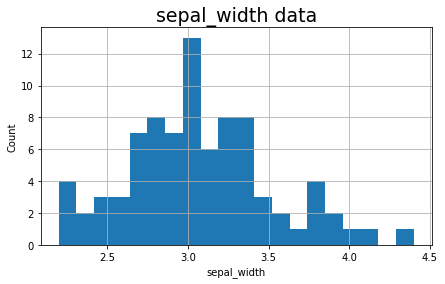

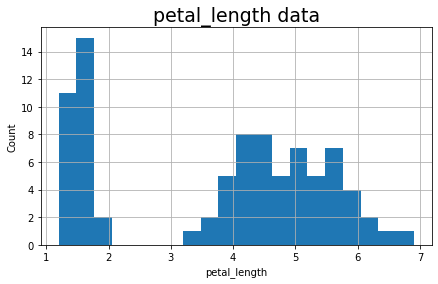

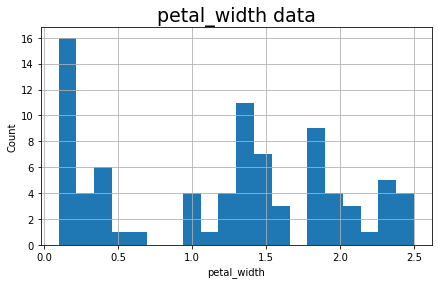

In [33]:
q_vars = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for m_type in q_vars:
    plt.figure(figsize = (7, 4))
    plt.title(f'{m_type} data', size = 19)
    plt.xlabel(f'{m_type}')
    plt.ylabel('Count')
    train[m_type].hist(bins = 20)
train[q_vars].describe().T

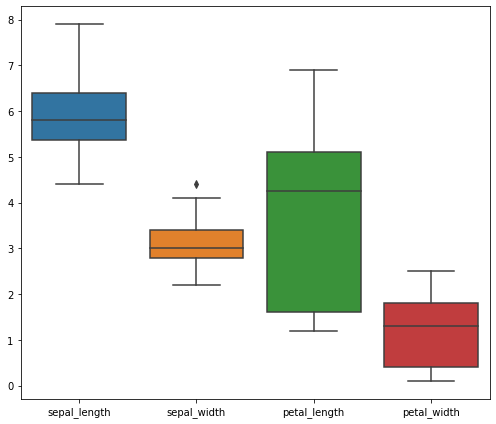

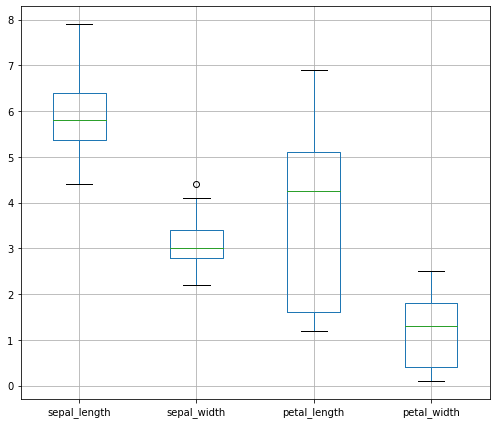

In [34]:
plt.figure(figsize = (7, 6))
sns.boxplot(data = train[q_vars])
plt.tight_layout()
plt.grid(False);
plt.figure(figsize = (7, 6))
train[q_vars].boxplot()
plt.grid(True)
plt.tight_layout();

In [60]:
species = ['setosa', 'versicolor', 'virginica']
train.species.value_counts(normalize = True)

versicolor    0.333333
setosa        0.333333
virginica     0.333333
Name: species, dtype: float64

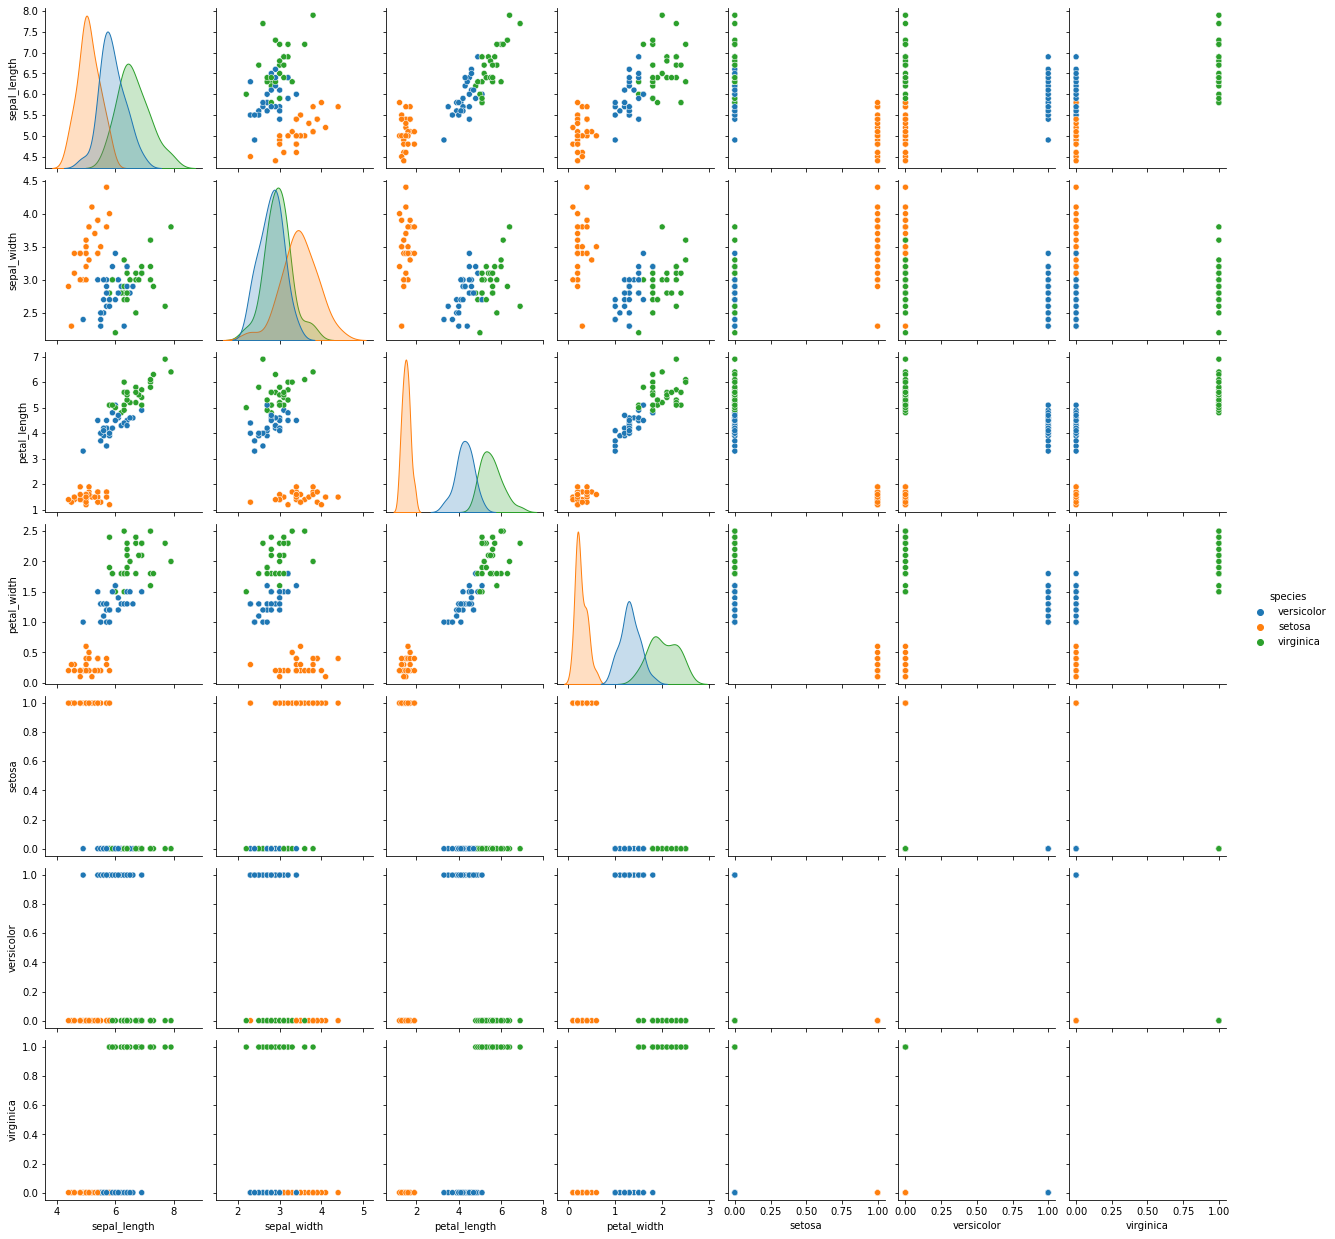

In [66]:
sns.pairplot(data = train, hue = 'species')

#### 3) Bivariate Stats

Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

#### 4) Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions

# Tidy Exercises

#### 1) Attendance Data

Load the attendance.csv file and calculate an attendnace percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

You should end up with something like this:


name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: grade, dtype: float64

#### 2) Coffee Levels

Read the coffee_levels.csv file.

Transform the data so that each carafe is in it's own column.
Is this the best shape for the data?

#### 3) Cake Recipes

Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

Tidy the data as necessary.

Which recipe, on average, is the best? recipe b

Which oven temperature, on average, produces the best results? 275

Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

#### 1) Attendance Data

Load the attendance.csv file and calculate an attendnace percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [36]:
attendance = pd.read_csv('untidy-data/attendance.csv')

In [37]:
attendance

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [38]:
col_names = attendance.columns.to_list()

In [39]:
col_names = pd.Series(col_names)
col_names

0    Unnamed: 0
1    2018-01-01
2    2018-01-02
3    2018-01-03
4    2018-01-04
5    2018-01-05
6    2018-01-06
7    2018-01-07
8    2018-01-08
dtype: object

In [40]:
attendance.columns = col_names
attendance.columns = col_names.str.replace('Unnamed: 0', 'student')
attendance

,student,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [41]:
attendance_melt = attendance.melt(id_vars = ['student'], var_name = 'Day', value_name = 'attendance_status')
attendance_melt

,student,Day,attendance_status
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [42]:
attendance_melt['attendance_percentage'] = attendance_melt['attendance_status'].replace('P', '1').replace('A', '0').replace('T', '0.9').replace('H', '0.5')

In [43]:
attendance_melt['attendance_percentage'] = attendance_melt['attendance_percentage'].astype(float)

In [44]:
attendance_melt.info()
attendance_melt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   student                32 non-null     object 
 1   Day                    32 non-null     object 
 2   attendance_status      32 non-null     object 
 3   attendance_percentage  32 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


,student,Day,attendance_status,attendance_percentage
0,Sally,2018-01-01,P,1.0
1,Jane,2018-01-01,A,0.0
2,Billy,2018-01-01,A,0.0
3,John,2018-01-01,P,1.0
4,Sally,2018-01-02,T,0.9


In [45]:
students = attendance_melt.student.value_counts().index
students

Index(['Sally', 'Billy', 'John', 'Jane'], dtype='object')

In [46]:
output_list = []
for student in students:
    subset = attendance_melt[attendance_melt.student == student]
    grade = subset.attendance_percentage.mean()
    resulting_dictionary = {
        'student': student,
        'grade': grade
    }
    output_list.append(resulting_dictionary)
pd.DataFrame(output_list).sort_values('student')

,student,grade
1,Billy,0.5250
3,Jane,0.6875
2,John,0.9125
0,Sally,0.7625


#### 2) Coffee Levels

Read the coffee_levels.csv file.

Transform the data so that each carafe is in it's own column.
Is this the best shape for the data?

In [47]:
coffee_levels = pd.read_csv('untidy-data/coffee_levels.csv')
coffee_levels.info()
coffee_levels.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           30 non-null     int64  
 1   coffee_carafe  30 non-null     object 
 2   coffee_amount  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


In [48]:
coffee_levels.coffee_carafe.value_counts()

y    10
z    10
x    10
Name: coffee_carafe, dtype: int64

In [49]:
pivot_coffee = coffee_levels.pivot_table(index = 'hour', columns = 'coffee_carafe', values = 'coffee_amount')
pivot_coffee

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


In [50]:
#I think this is a good shape for the data

#### 3) Cake Recipes

Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

In [51]:
cakes = pd.read_csv('untidy-data/cake_recipes.csv')
cakes

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


Tidy the data as necessary.

In [52]:
cakes[['recipe', 'position']] = cakes['recipe:position'].str.split(':', expand = True)
cakes.drop(columns = ['recipe:position'], inplace=True)
cakes

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom
5,71.306308,82.795477,92.098049,53.960273,c,top
6,52.799753,58.670419,51.747686,56.183110,d,bottom
7,96.873178,76.101363,59.571620,50.971626,d,top


In [53]:
cake_melt = cakes.melt(id_vars = ['recipe', 'position'], var_name = 'temperature', value_name = 'tastiness_score')
cake_melt = cake_melt.sort_values(['recipe', 'temperature']).reset_index()
cake_melt = cake_melt.drop(columns = 'index')
cake_melt

,recipe,position,temperature,tastiness_score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,a,bottom,250,53.912627
3,a,top,250,52.009735
4,a,bottom,275,74.414730
5,a,top,275,68.576858
6,a,bottom,300,98.786784
7,a,top,300,50.228470
8,b,bottom,225,57.095320
9,b,top,225,82.455004


Which recipe, on average, is the best? recipe b

In [54]:
recipe_average_scores = cake_melt.groupby('recipe').tastiness_score.mean().sort_values(ascending = False)
print(f'Recipe {recipe_average_scores.idxmax()}, on average, is the best. The average tastiness score for recipe {recipe_average_scores.idxmax()} is {round(recipe_average_scores.max(), 2)}.')
print('=======')
print(recipe_average_scores)

Recipe b, on average, is the best. The average tastiness score for recipe b is 76.74.
recipe
b    76.736074
c    75.874748
a    63.922201
d    62.864844
Name: tastiness_score, dtype: float64


Which oven temperature, on average, produces the best results? 275

In [55]:
temperature_average_scores = cake_melt.groupby('temperature').tastiness_score.mean().sort_values(ascending = False)
print(f'{temperature_average_scores.idxmax()} degrees Farenheit, on average, produces the best results. The average tastiness score for {temperature_average_scores.idxmax()} degrees Farenheit is {round(temperature_average_scores.max(), 2)}.')
print('=======')
print(temperature_average_scores)

275 degrees Farenheit, on average, produces the best results. The average tastiness score for 275 degrees Farenheit is 74.89.
temperature
275    74.886754
225    71.306022
300    66.627655
250    66.577437
Name: tastiness_score, dtype: float64


Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [56]:
wedding_cake = cake_melt.groupby(['recipe', 'position', 'temperature']).tastiness_score.max()
wedding_cake.index

MultiIndex([('a', 'bottom', '225'),
            ('a', 'bottom', '250'),
            ('a', 'bottom', '275'),
            ('a', 'bottom', '300'),
            ('a',    'top', '225'),
            ('a',    'top', '250'),
            ('a',    'top', '275'),
            ('a',    'top', '300'),
            ('b', 'bottom', '225'),
            ('b', 'bottom', '250'),
            ('b', 'bottom', '275'),
            ('b', 'bottom', '300'),
            ('b',    'top', '225'),
            ('b',    'top', '250'),
            ('b',    'top', '275'),
            ('b',    'top', '300'),
            ('c', 'bottom', '225'),
            ('c', 'bottom', '250'),
            ('c', 'bottom', '275'),
            ('c', 'bottom', '300'),
            ('c',    'top', '225'),
            ('c',    'top', '250'),
            ('c',    'top', '275'),
            ('c',    'top', '300'),
            ('d', 'bottom', '225'),
            ('d', 'bottom', '250'),
            ('d', 'bottom', '275'),
            ('d', 'bottom', 

In [57]:
print(f'Baking a cake with "recipe {wedding_cake.idxmax()[0]}" on the {wedding_cake.idxmax()[1]} rack at {wedding_cake.idxmax()[2]} degrees Farenheit gave the best tastiness score.')

Baking a cake with "recipe b" on the bottom rack at 300 degrees Farenheit gave the best tastiness score.
